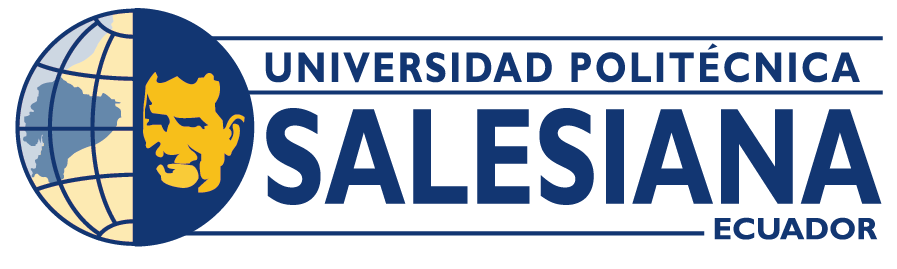

**CUARTETO DE ANSCOMBE**

---

**Estudiante:** Kelly Paltin

# **Importación de Librerías**

In [91]:
!pip install pandas

In [92]:
!pip install matplotlib seaborn

In [93]:
!pip install scipy

# **Carga del Dataset**

In [95]:
import pandas as pd

# Utiliza una cadena cruda (raw string) para evitar problemas con las barras invertidas
ruta_csv = r'C:\Users\USUARIO_PC\OneDrive\Documents\CICLO8\MINERIA_DE_DATOS\Anscombe\data\df_anscombe.csv'

df_anscombe = pd.read_csv(ruta_csv)

print(df_anscombe.head())


      x     y  group
0  10.0  8.04      1
1   8.0  6.95      1
2  13.0  7.58      1
3   9.0  8.81      1
4  11.0  8.33      1


# **Resumen Estadístico**

In [97]:
df_anscombe.groupby('group').describe()

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

# **Gráficas de los Conjuntos de Datos**

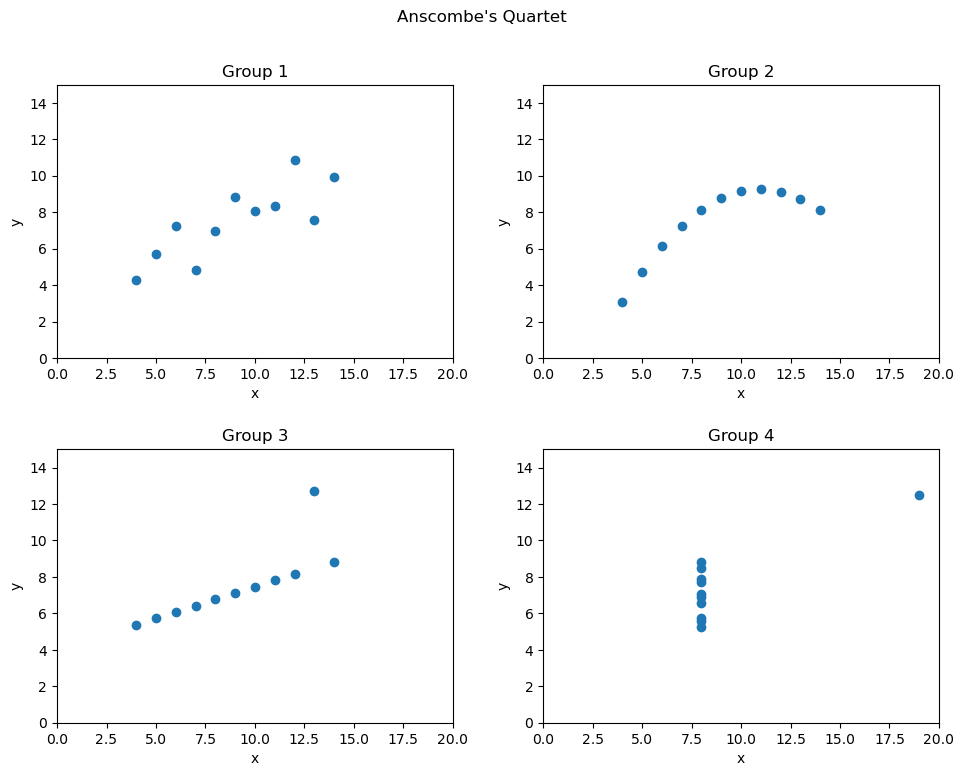

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Anscombe's Quartet")

grupos = df_anscombe['group'].unique()

for i, grupo in enumerate(grupos):
    fila = i // 2
    columna = i % 2
    data_grupo = df_anscombe[df_anscombe['group'] == grupo]
    
    axs[fila, columna].scatter(data_grupo['x'], data_grupo['y'])
    axs[fila, columna].set_title(f'Group {grupo}')
    axs[fila, columna].set_xlim(0, 20)
    axs[fila, columna].set_ylim(0, 15)

for ax in axs.flat:
    ax.label_outer()  
    ax.tick_params(labelbottom=True, labelleft=True) 

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

fig.tight_layout(pad=2.0)

plt.show()


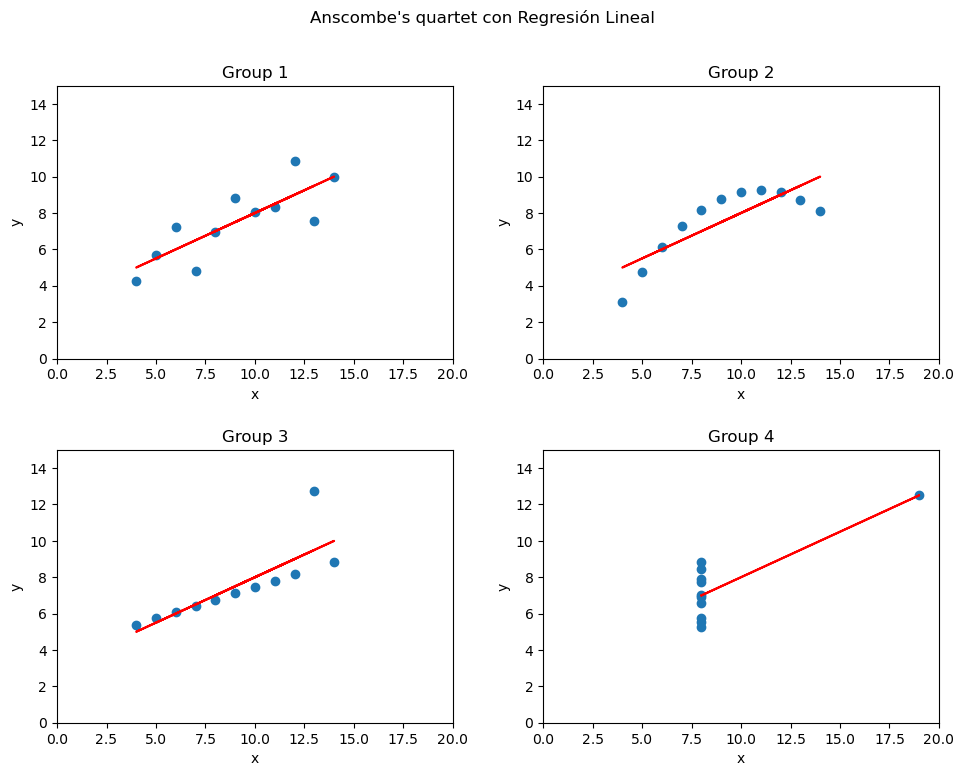

In [100]:
from scipy.stats import linregress

##Regresión Lineal de cada Conjunto/Grupo de Datos

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Anscombe's quartet con Regresión Lineal")

grupos = df_anscombe['group'].unique()

for i, grupo in enumerate(grupos):
    fila = i // 2
    columna = i % 2
    data_grupo = df_anscombe[df_anscombe['group'] == grupo]

    axs[fila, columna].scatter(data_grupo['x'], data_grupo['y'], label=f'Group {grupo}')

    slope, intercept, r_value, p_value, std_err = linregress(data_grupo['x'], data_grupo['y'])

    x_vals = data_grupo['x']
    y_vals = intercept + slope * x_vals
    axs[fila, columna].plot(x_vals, y_vals, color='red', label='Línea de regresión')

    axs[fila, columna].set_title(f'Group {grupo}')
    axs[fila, columna].set_xlim(0, 20)
    axs[fila, columna].set_ylim(0, 15)

for ax in axs.flat:
    ax.label_outer()  
    ax.tick_params(labelbottom=True, labelleft=True) 

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

fig.tight_layout(pad=2.0)

plt.show()


# **Gráficas de los box-plot de cada Grupo**

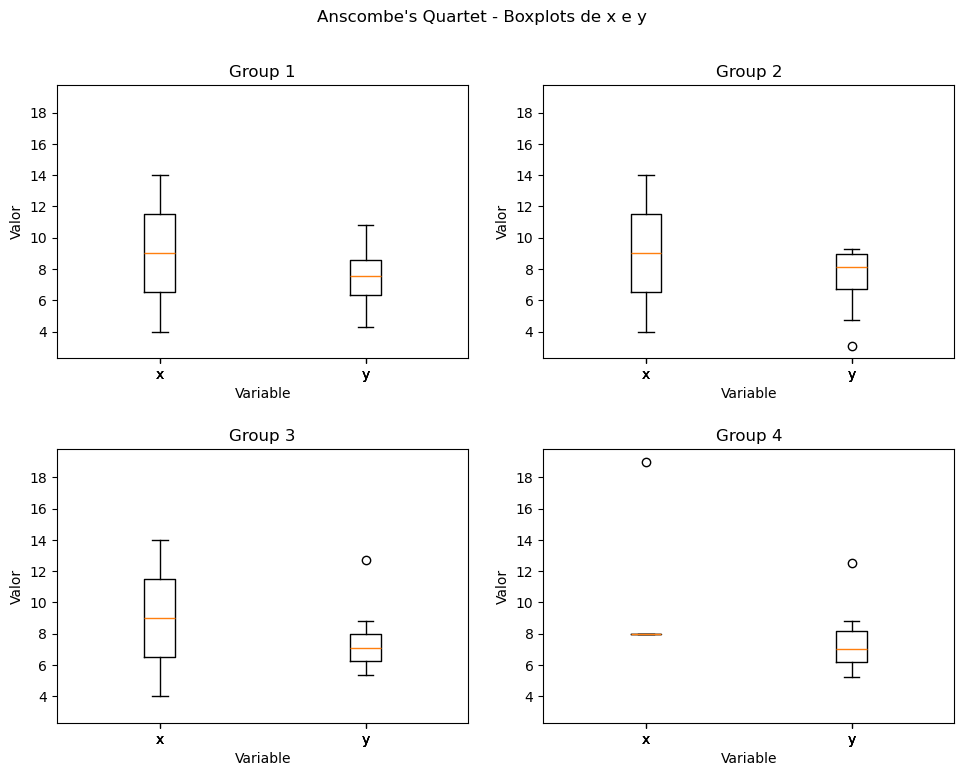

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Anscombe's Quartet - Boxplots de x e y")

grupos = df_anscombe['group'].unique()

for i, grupo in enumerate(grupos):
    fila = i // 2
    columna = i % 2
    data_grupo = df_anscombe[df_anscombe['group'] == grupo]
    
    axs[fila, columna].boxplot([data_grupo['x'], data_grupo['y']], labels=['x', 'y'])
    axs[fila, columna].set_title(f'Group {grupo}')

for ax in axs.flat:
    ax.label_outer()  
    ax.tick_params(labelbottom=True, labelleft=True)
    
for ax in axs.flat:
    ax.set(xlabel='Variable', ylabel='Valor')

fig.tight_layout(pad=2.0)

plt.show()
